# Perceptron implementation

This code demonstrates basic implementation of a perceptron using NumPy and Pandas packages.

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../')
from src.perceptron import (
    network_init,
    generate_data,
    get_weighted_sum,
    sigmoid,
    confusion_matrix,
    forward_prop,
    cross_entropy
)

#print(help(generate_data))
#print(help(get_weighted_sum))
#print(help(sigmoid))
#print(help(confusion_matrix))

In [2]:
n_features = 3
m_examples = 15
data = generate_data(m_examples, n_features, seed=29)
print('Features and labels matrix:\n---------------------------\n')
print(data, '\n\n---------------------------')
X = data.drop(columns=['targets']).values
Y = data['targets'].values
print(f'Number of features: {X.shape[1]}')
print(f'Number of training examples: {X.shape[0]}')

Features and labels matrix:
---------------------------

          x0        x1        x2  targets
0   0.050047  0.506322  0.519234        1
1   0.265203  0.129222  0.020731        1
2   0.393828  0.380229  0.023452        1
3   0.238212  0.788106  0.617595        1
4   0.982793  0.861112  0.631429        1
5   0.186492  0.841894  0.421253        1
6   0.028407  0.952240  0.943834        0
7   0.321769  0.493433  0.272774        0
8   0.760770  0.971630  0.608703        1
9   0.613694  0.231440  0.268094        0
10  0.381394  0.568859  0.732517        1
11  0.047114  0.561463  0.966119        0
12  0.218823  0.417570  0.043238        1
13  0.792898  0.160876  0.658430        1
14  0.236390  0.945161  0.873438        0 

---------------------------
Number of features: 3
Number of training examples: 15


In [3]:
seed_init=None
weights, bias = network_init(n_features, seed=seed_init)
print('Initial network parameters:')
for i in range(len(weights)):
    print(f'w{i} = {weights[i]}')
print(f'b = {bias}')

Initial network parameters:
w0 = 0.8084918032685354
w1 = 0.7218645222978605
w2 = 0.6201022995554978
b = 0


# Forward propagation

In this section, forward propagation through the perceptron is performed 

In [4]:
Y_hat, weighted_sums, sigmoids = forward_prop(X, weights, bias)
initial_pass = pd.DataFrame({'weighted_sum':weighted_sums, 'Y':Y, 'Y_hat':Y_hat, 'sigmoid':sigmoids,})
acc_init = (initial_pass['Y'] == initial_pass['Y_hat']).mean()
print(f'Initial forward propagation results (acc={acc_init:.2f}):\n---------------------------\n')
print(initial_pass)

Initial forward propagation results (acc=0.67):
---------------------------

    weighted_sum  Y  Y_hat   sigmoid
0       0.727937  1      1  0.674352
1       0.320551  1      1  0.579458
2       0.607423  1      1  0.647353
3       1.144471  1      1  0.758500
4       1.807737  1      1  0.859088
5       1.019731  1      1  0.734920
6       1.295628  0      1  0.785098
7       0.785487  0      1  0.686862
8       1.693920  1      1  0.844739
9       0.829481  0      1  0.696245
10      1.173228  1      1  0.763728
11      1.042484  0      1  0.739329
12      0.505157  1      1  0.623671
13      1.165477  1      1  0.762326
14      1.415019  0      1  0.804556


## Cross-entropy loss

In [5]:
cross_entropy_cost = cross_entropy(Y, sigmoids)
initial_pass_with_cost = initial_pass.copy()
initial_pass_with_cost.drop(columns=['weighted_sum'], inplace=True)
initial_pass_with_cost['c-e loss'] = cross_entropy_cost
print(initial_pass_with_cost)

    Y  Y_hat   sigmoid  c-e loss
0   1      1  0.674352  0.171113
1   1      1  0.579458  0.236978
2   1      1  0.647353  0.188859
3   1      1  0.758500  0.120045
4   1      1  0.859088  0.065962
5   1      1  0.734920  0.133760
6   0      1  0.785098  0.667760
7   0      1  0.686862  0.504264
8   1      1  0.844739  0.073277
9   0      1  0.696245  0.517477
10  1      1  0.763728  0.117061
11  0      1  0.739329  0.583907
12  1      1  0.623671  0.205045
13  1      1  0.762326  0.117859
14  0      1  0.804556  0.708978


## Network training

This training algorithm updates weights and bias after each pass through the training data. It means, that after each training example, weights and bias are updated.

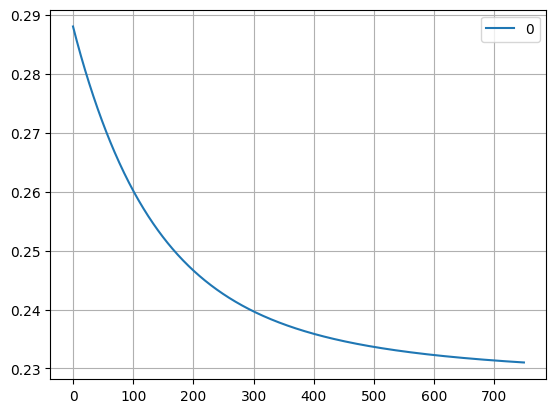

In [6]:
learning_rate = 0.1
epochs = 750

def cross_entropy_loss(y, y_hat):
    return -(y*np.log10(y_hat) + (1-y)*np.log10(1-y_hat))

def update_weights(weights, alpha, target, prediction, feature):
    return [w + alpha*(target-prediction)*x for x, w in zip(feature, weights)]

def update_bias(bias, alpha, y, y_hat):
    return bias + alpha*(y-y_hat)
        
def train_model(X, Y, alpha=0.01, n_epoch=100):
    W, b = network_init(n_features, seed=seed_init)
    epoch_cost = []
    for e in range(n_epoch):
        m = X.shape[0]
        individual_loss = []
        for i in range(m):
            x = X[i]
            y = Y[i]
            w_sum = get_weighted_sum(x, W, b)
            y_hat = sigmoid(w_sum)
            loss = cross_entropy_loss(y, y_hat)
            individual_loss.append(loss)
            # gradient descent
            W = update_weights(W, alpha, y, y_hat, x)
            b = update_bias(b, alpha, Y[i], y_hat)
        average_cost = sum(individual_loss)/len(individual_loss)
        epoch_cost.append(average_cost)
    return W, b, epoch_cost
        
final_weights, final_bias, epoch_cost = train_model(X, Y, n_epoch=epochs)

training_data = pd.DataFrame(epoch_cost)
training_data_plot = training_data.plot(kind="line", grid=True)
training_data_plot;

In [7]:
Y_hat_final, weighted_sums_final, _ = forward_prop(X, final_weights, final_bias)
final_pass = pd.DataFrame({'weighted_sum':weighted_sums_final, 'Y':Y, 'Y_hat':Y_hat_final})
acc_final = (final_pass['Y'] == final_pass['Y_hat']).mean()
print(f'Final forward propagation results (acc={acc_final:.2f}):\n---------------------------\n')
print(final_pass)

Final forward propagation results (acc=0.87):
---------------------------

    weighted_sum  Y  Y_hat
0       0.062488  1      1
1       1.417651  1      1
2       1.808985  1      1
3       0.374828  1      1
4       1.888503  1      1
5       0.743593  1      1
6      -0.696781  0      0
7       1.161761  0      1
8       1.551665  1      1
9       1.618854  0      1
10      0.284339  1      1
11     -0.923422  0      0
12      1.430994  1      1
13      1.060045  1      1
14     -0.121153  0      0


In [8]:
print(confusion_matrix(Y, Y_hat_final))

[[10.  0.]
 [ 2.  3.]]


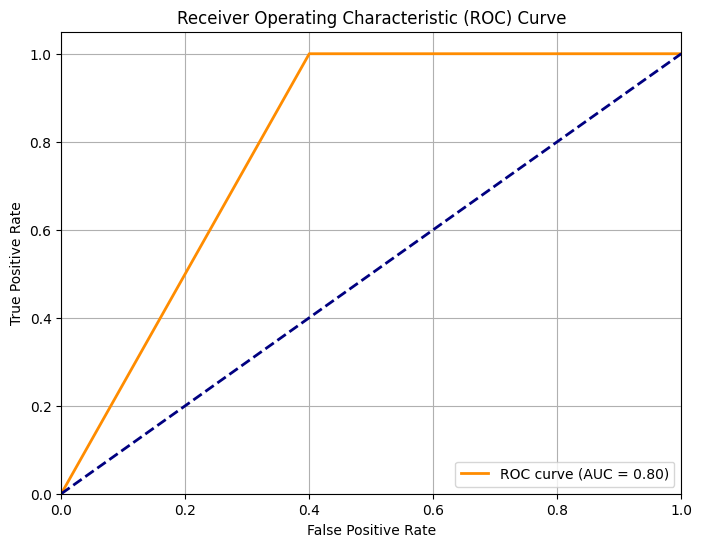

In [9]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y, Y_hat_final)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()